In [5]:
import numpy as np 
import pandas as pd
from scipy.interpolate import UnivariateSpline 
import matplotlib.pyplot as plt
plt.style.use('sensitivity.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

import histlite as hl

In [12]:
def ComputeHalflifeFromNumCounts( counts ):
    
    # Returns the half life which would give (on average) the input number of signal counts
    
    N_A = 6.02e23 # atoms/mol
    FidMass = 3281 # kg
    AtomicMass = 135.8 # g/mol
    EnrichmentFraction = 0.9
    SigEfficiency = 0.96
    Livetime = 10 # years
    
    return FidMass*1.e3 / AtomicMass * N_A * EnrichmentFraction * Livetime * \
            SigEfficiency * np.log(2) / counts


def BrazilPlot(hist, median, quantiles68=[None,None], quantiles95=[None,None],\
               save=False, label=''):
    
    hl.plot1d(hist,color='k',linewidth=3,label='90\% UL distribution')
    
    y1 = 0.
    y2 = np.max(hist.values)*1.1
    
    xmed = np.ones(10)*median
    ymed = np.linspace(y1,y2,10)
    plt.plot(xmed,ymed,'--b',label='Median = {:3.3} cts'.format(median))
    
    plt.fill_between( np.linspace(quantiles95[0],quantiles68[0],10),\
                    np.ones(10)*y1,np.ones(10)*y2,color=(0.9,0.9,0.),alpha=0.5)
    plt.fill_between( np.linspace(quantiles68[0],median,10),\
                    np.ones(10)*y1,np.ones(10)*y2,color=(0.,0.9,0.),alpha=0.5)
    plt.fill_between( np.linspace(median,quantiles68[1],10),\
                    np.ones(10)*y1,np.ones(10)*y2,color=(0.,0.9,0.),alpha=0.5,\
                    label='68\% quantile = [{:3.3}, {:3.3}]'.format(quantiles68[0],quantiles68[1]))
    plt.fill_between( np.linspace(quantiles68[1],quantiles95[1],10),\
                    np.ones(10)*y1,np.ones(10)*y2,color=(0.9,0.9,0.),alpha=0.5,\
                    label='95\% quantile = [{:3.3}, {:3.3}]'.format(quantiles95[0],quantiles95[1]))
    
    
    plt.xlabel(r'90\% upper limit on $0\nu\beta\beta$ [Events]')
    plt.ylabel('Number of toy datasets')
    
    print('Median sensitivity: {:4.4} yrs'.format(ComputeHalflifeFromNumCounts(median)))
    print('Central 68% quantile: {:4.4} -- {:4.4} yrs'.format( \
                                    ComputeHalflifeFromNumCounts(quantiles68[1]),\
                                    ComputeHalflifeFromNumCounts(quantiles68[0])))
    print('Central 95% quantile: {:4.4} -- {:4.4} yrs'.format( \
                                    ComputeHalflifeFromNumCounts(quantiles95[1]),\
                                    ComputeHalflifeFromNumCounts(quantiles95[0])))
    
    plt.xlim(0.,40.)
    plt.ylim(y1,y2)
    plt.legend(loc='upper right',fontsize=15,framealpha=1.)
    if save:
        plt.savefig('brazil_plot_{}.png'.format(label),dpi=200,bbox_inches='tight')
        
        

# Load data and make plot

In [13]:
upper_limits = np.genfromtxt('Data/d024_90percent_upper_limits_rn222x1.csv',\
                              skip_header=1)



Median sensitivity: 1.211e+28 yrs
Central 68% quantile: 6.951e+27 -- 2.551e+28 yrs
Central 95% quantile: 4.711e+27 -- 5.324e+28 yrs


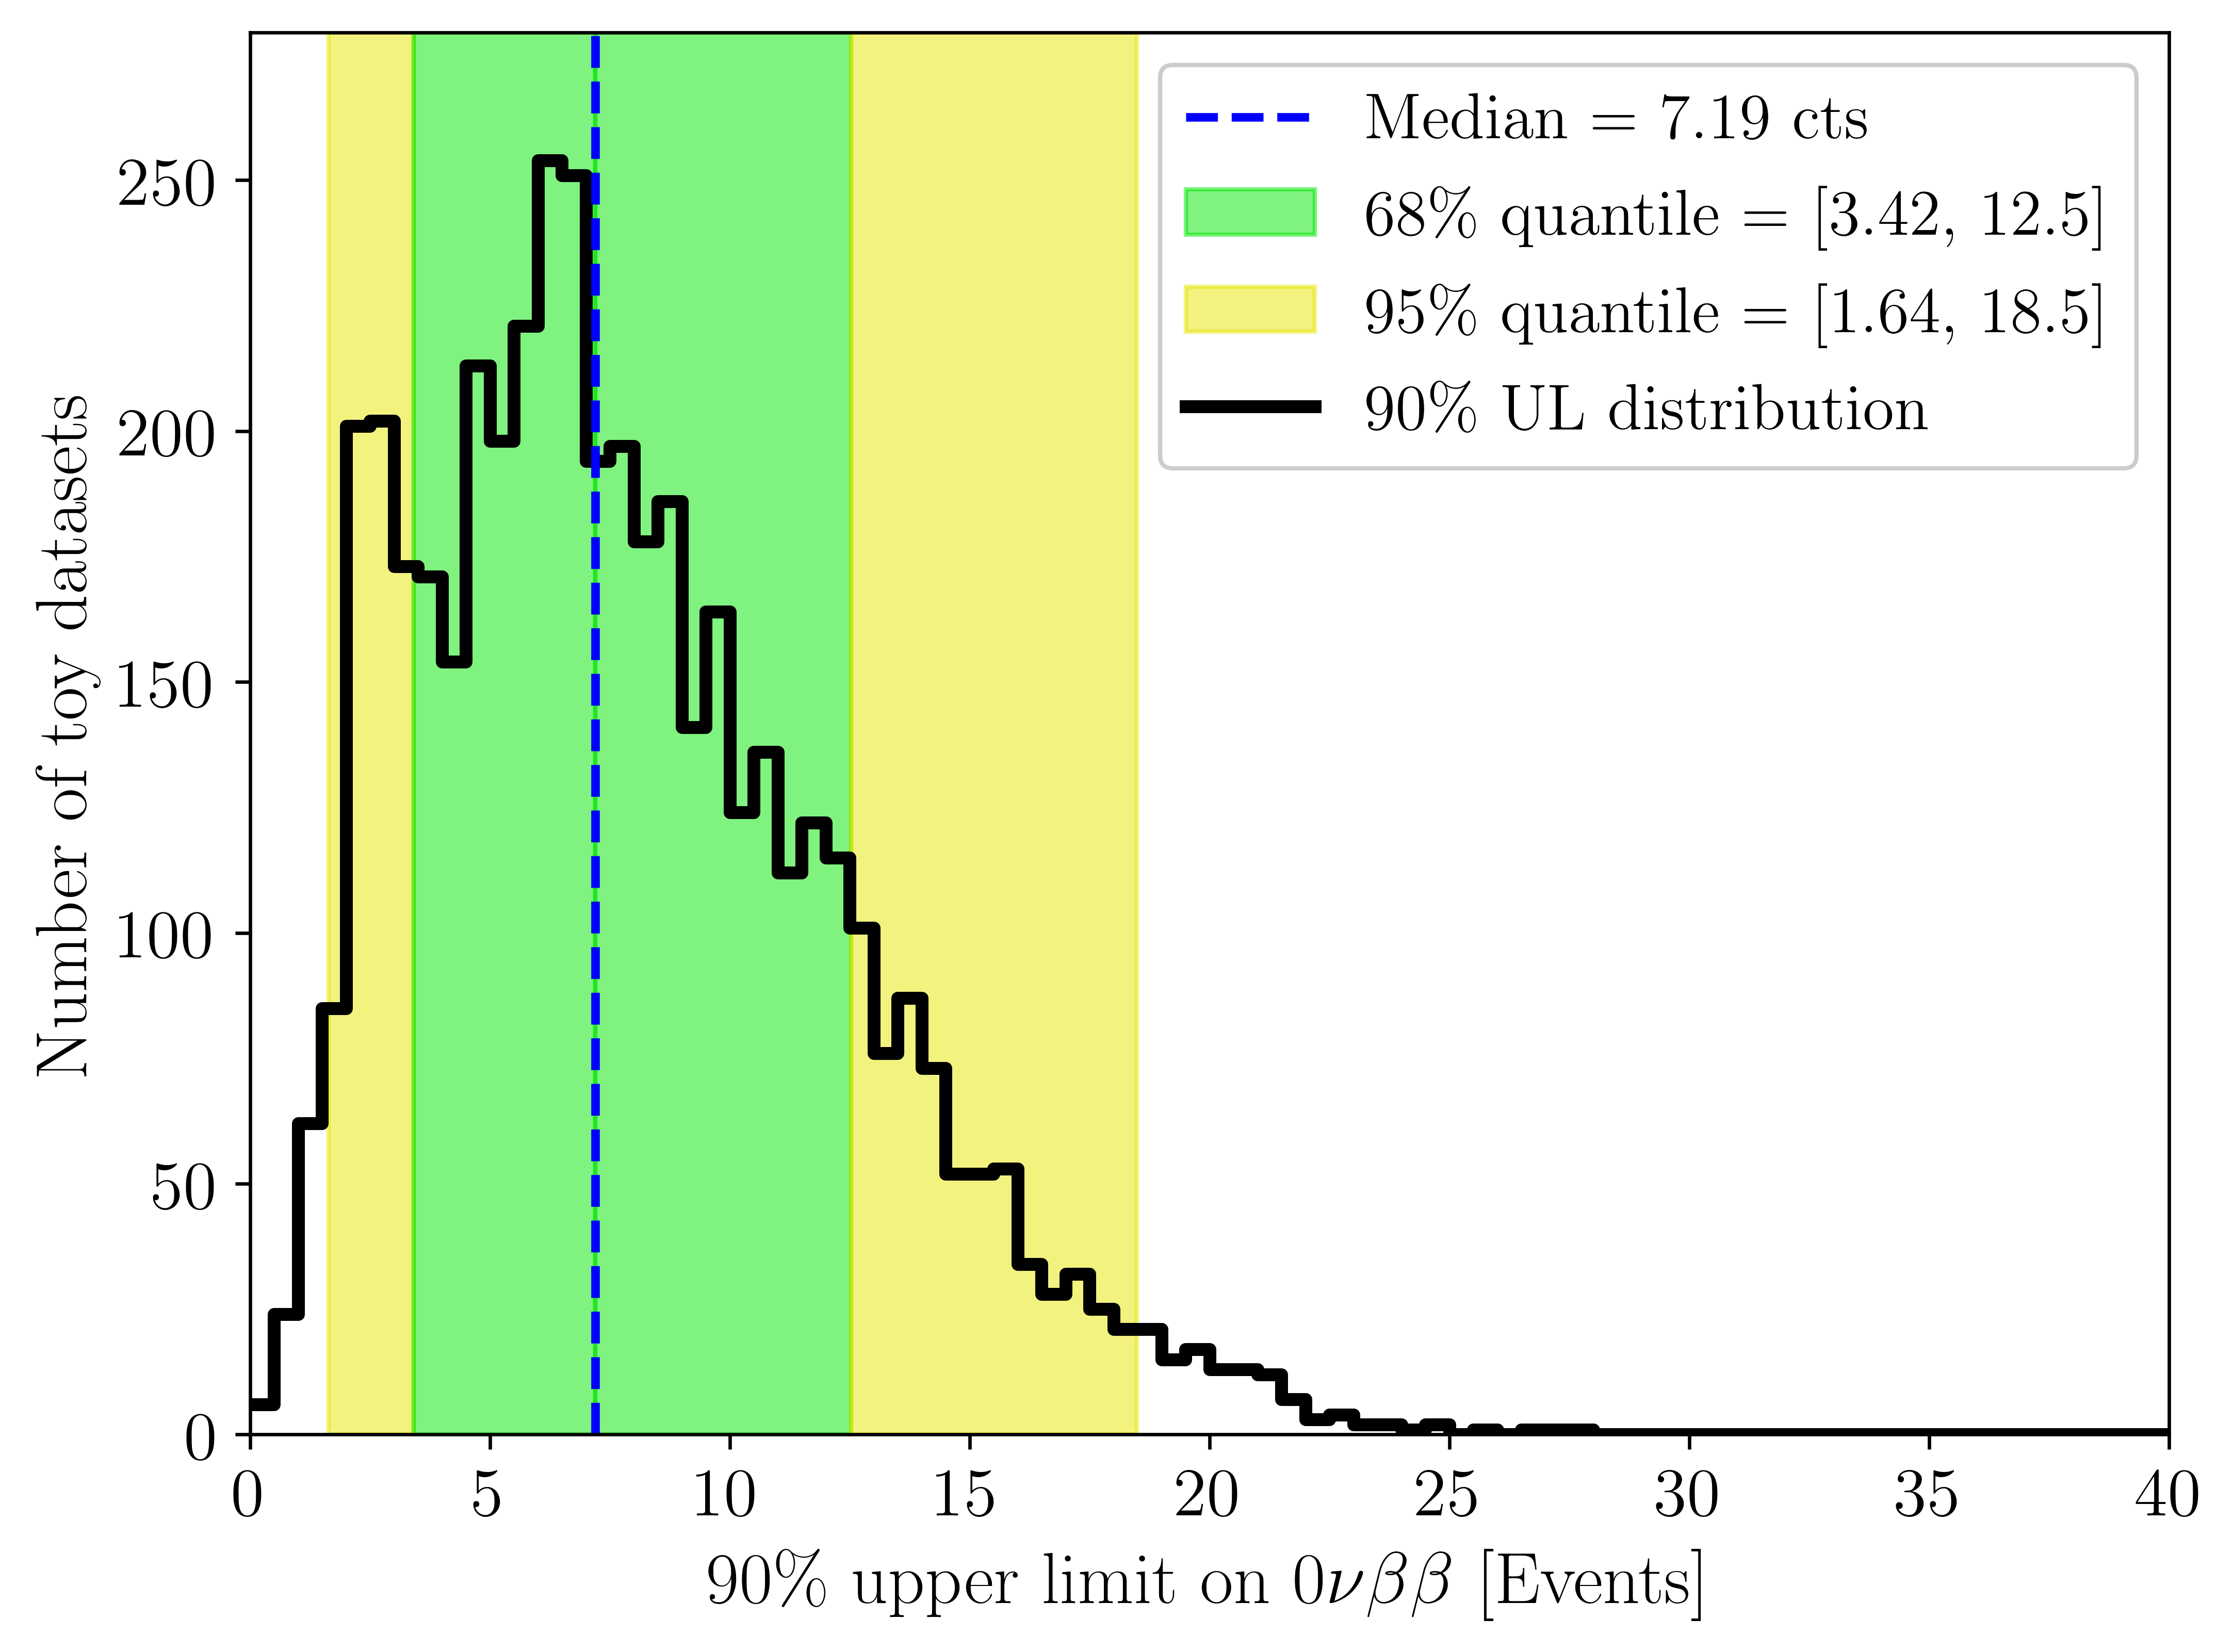

In [14]:
hist = hl.hist(upper_limits,bins=np.linspace(0.,50.,101))

this_68_quantile = [ np.quantile(upper_limits,0.16),\
                   np.quantile(upper_limits,0.84)]
this_95_quantile = [ np.quantile(upper_limits,0.025),\
                   np.quantile(upper_limits,0.975)]
this_median = np.median(upper_limits)

BrazilPlot(hist,\
           median=this_median,\
           quantiles68=this_68_quantile,\
           quantiles95=this_95_quantile,\
          save=True,\
          label='nominal_case_D024')